# Plan Stage

# Acquire Stage

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from env import username, host, password

In [2]:
#get connection to CodeUp database
get_connection('telco_churn', username, host, password)
print('works')

works


In [3]:
#new_telco_churn_data() will return telco_churn db from SQL into a pandas df
df = new_telco_churn_data()

In [4]:
#checking it out for good measure
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [5]:
#get_telco_churn_data() will return telco_churn db from SQL into a pandas df and create a .csv for us
df = get_telco_churn_data()

In [6]:
#making sure it looks good!
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [7]:
#checking out the information and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [8]:
#describing the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
#value counts
df.value_counts()

payment_type_id  contract_type_id  internet_service_type_id  customer_id  gender  senior_citizen  partner  dependents  tenure  phone_service  multiple_lines    online_security      online_backup        device_protection    tech_support         streaming_tv         streaming_movies     paperless_billing  monthly_charges  total_charges  churn  internet_service_type  contract_type   payment_type             
4                3                 3                         9975-GPKZU   Male    0               Yes      Yes         46      Yes            No                No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  No                 19.75            856.5          No     None                   Two year        Credit card (automatic)      1
1                3                 3                         4475-NVTLU   Male    0               Yes      Yes         45      Yes            No                No internet servi

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

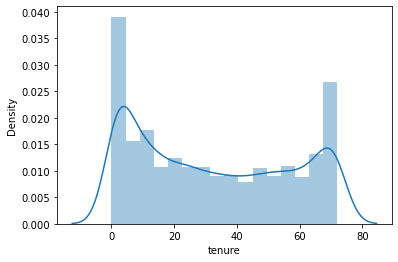

In [11]:
#distribution of tenure: we have a lot who stay for a long time, but a lot more who stay only for a short period.
sns.distplot(df.tenure)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='senior_citizen', ylabel='Density'>

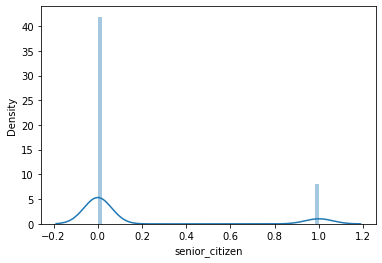

In [13]:
#distribution of whether a customer is a senior or not: most of our customers are non seniors.
sns.distplot(df.senior_citizen)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_charges', ylabel='Density'>

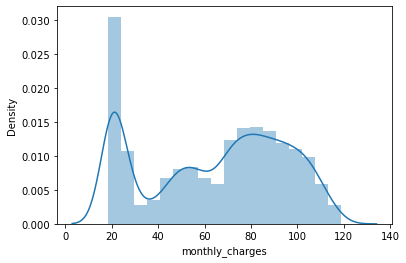

In [14]:
#distribution of monthly charges: bimodal/trimodal mess?
sns.distplot(df.monthly_charges)

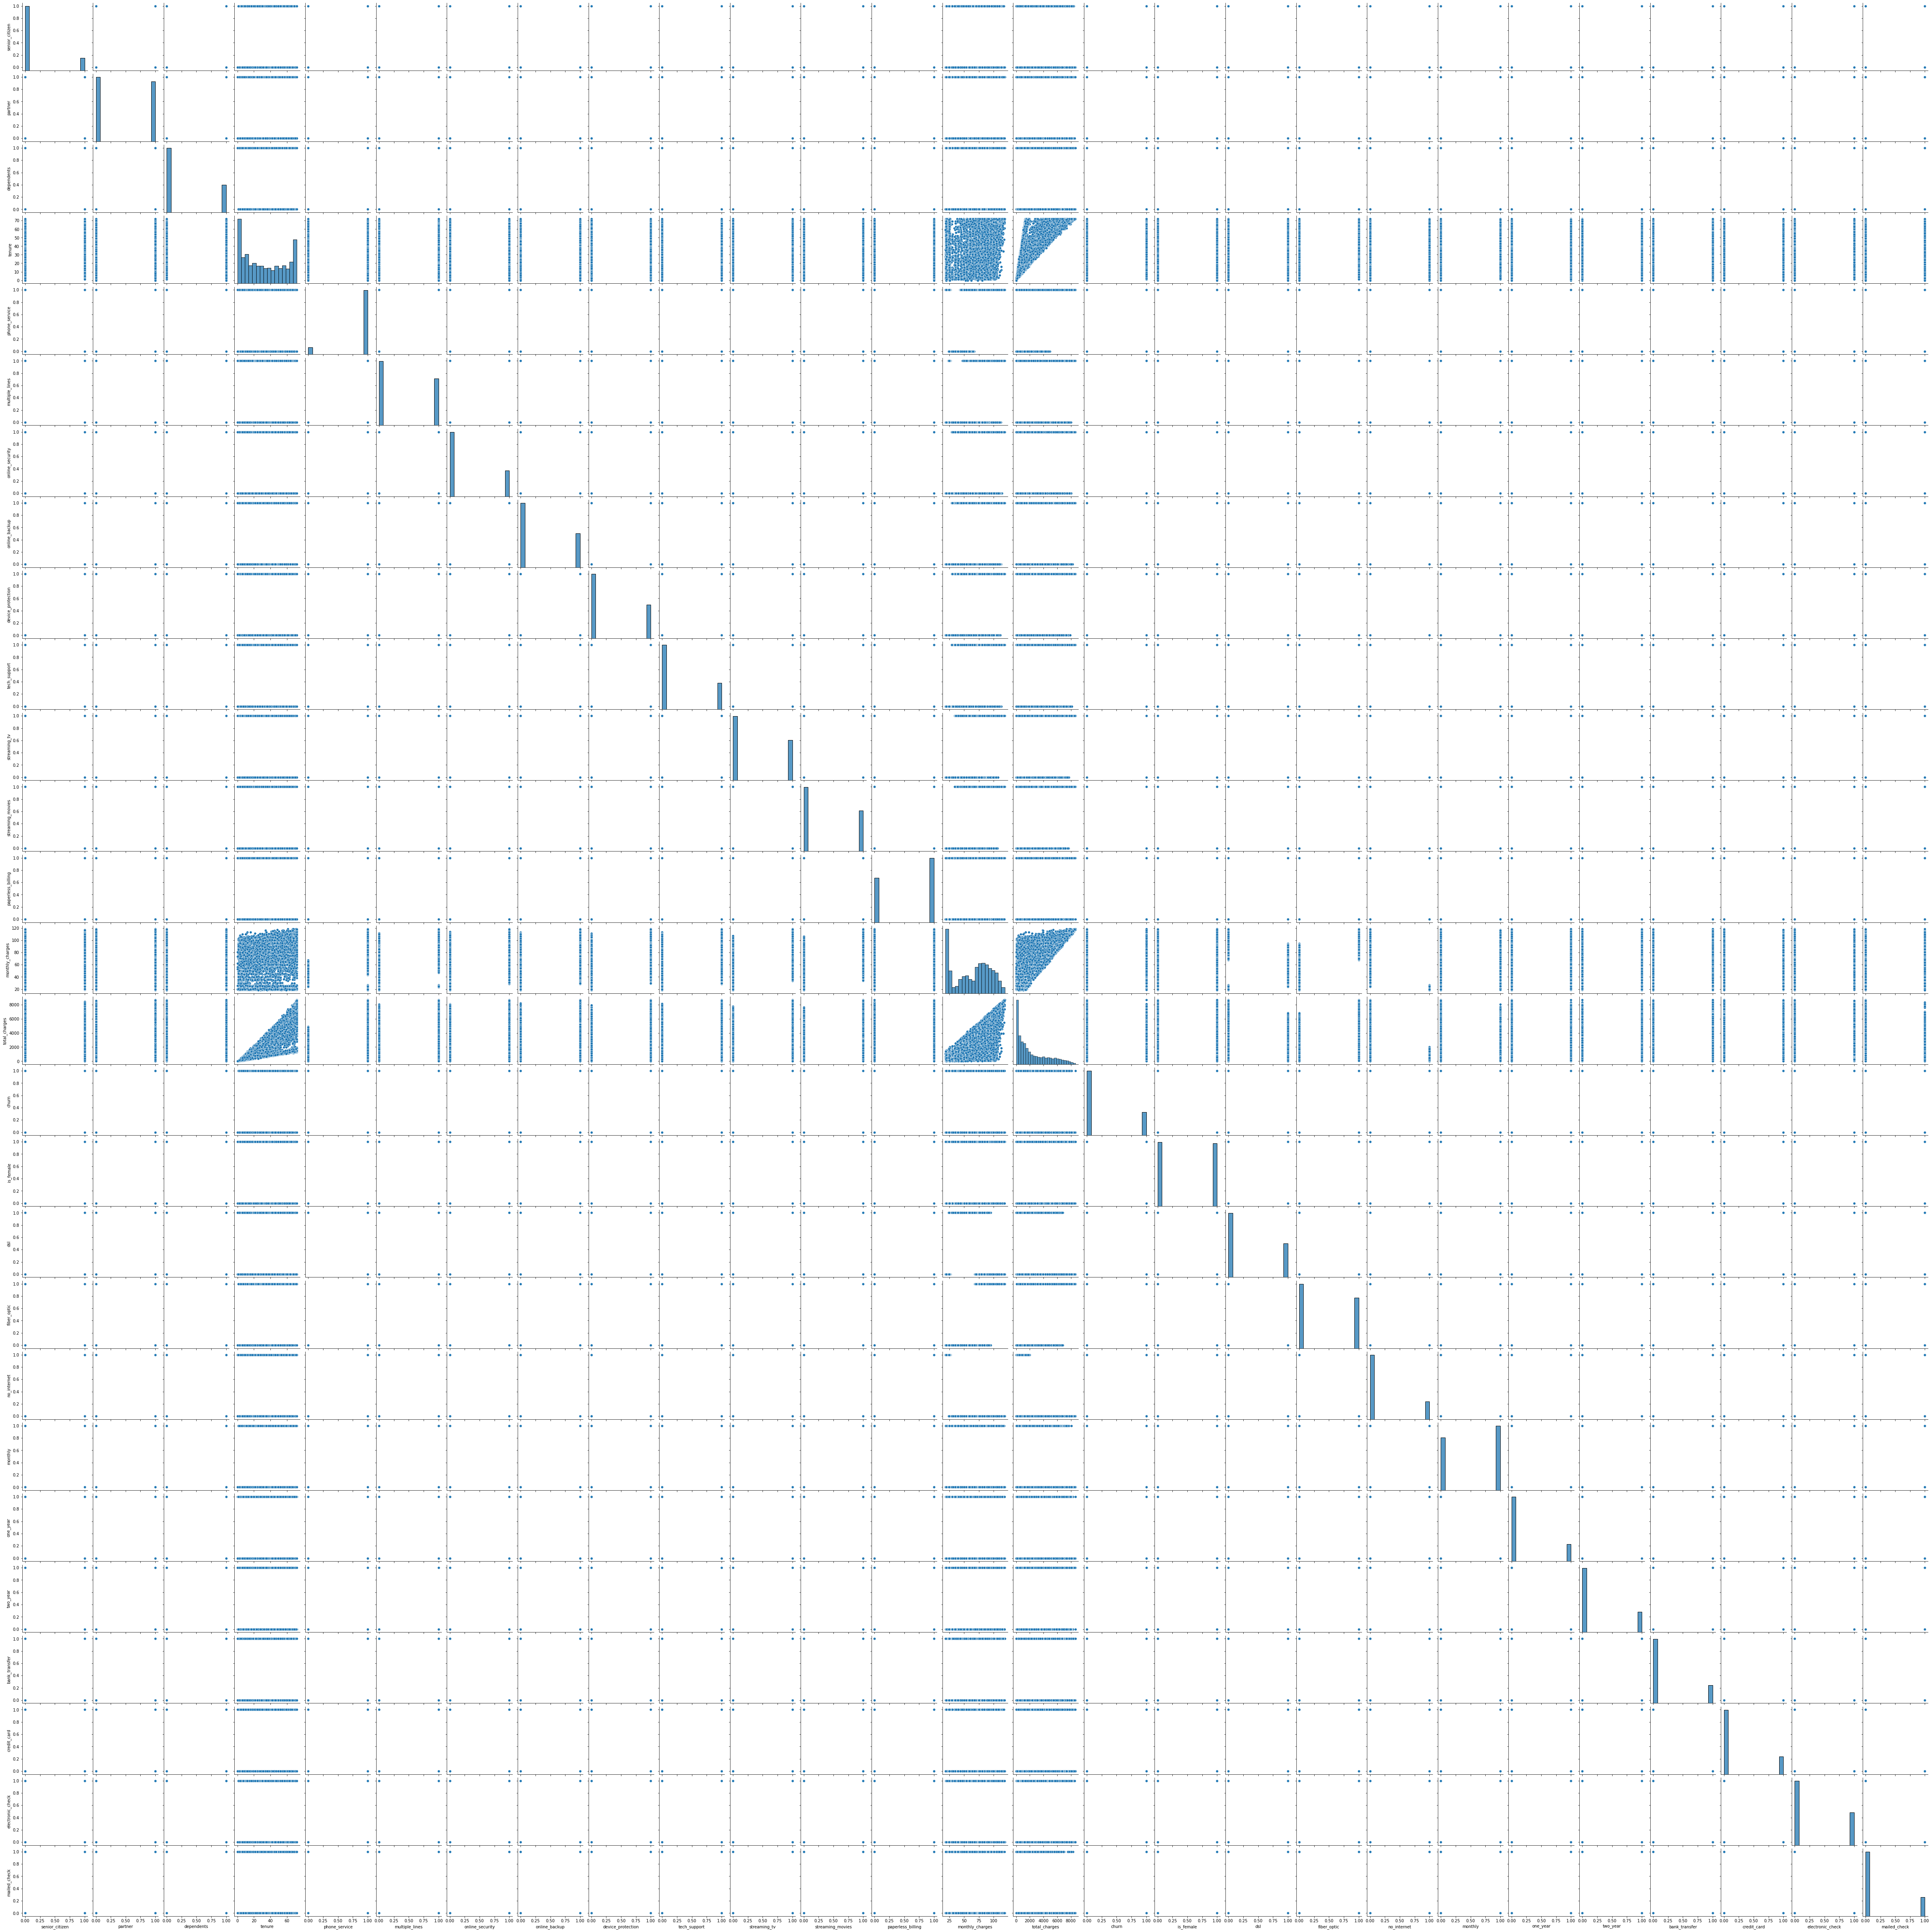

In [26]:
sns.pairplot(df)

In [ ]:
#acquire pieces work 

# Prepare Stage

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from env import host, username, password
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from prepare import num_distributions, clean_telco_churn, telco_churn_split, prep_telco_churn


In [33]:
#our total charges was an object, but we want it as numeric
df.total_charges = pd.to_numeric(df.total_charges, errors='coerce').astype('float64')
#there are 11 empty values for total charges (new customers), I filled them in with the mean of all monthly charges.
df.total_charges = df.total_charges.fillna(value=df.total_charges.mean()).astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   senior_citizen         7043 non-null   int64  
 1   partner                7043 non-null   int64  
 2   dependents             7043 non-null   int64  
 3   tenure                 7043 non-null   int64  
 4   phone_service          7043 non-null   int64  
 5   multiple_lines         7043 non-null   int64  
 6   online_security        7043 non-null   int64  
 7   online_backup          7043 non-null   int64  
 8   device_protection      7043 non-null   int64  
 9   tech_support           7043 non-null   int64  
 10  streaming_tv           7043 non-null   int64  
 11  streaming_movies       7043 non-null   int64  
 12  paperless_billing      7043 non-null   int64  
 13  monthly_charges        7043 non-null   float64
 14  total_charges          7043 non-null   float64
 15  chur

In [17]:
#just making sure it looks good
df.tail()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
7038,4,3,1,9919-FZDED,Male,1,Yes,No,72,Yes,...,No,Yes,Yes,Yes,84.10,5981.65,No,DSL,Two year,Credit card (automatic)
7039,3,3,1,9926-PJHDQ,Female,0,Yes,Yes,72,Yes,...,No,Yes,Yes,Yes,76.80,5468.45,No,DSL,Two year,Bank transfer (automatic)
7040,2,3,1,9928-BZVLZ,Female,0,No,No,12,No,...,Yes,No,Yes,No,49.85,552.1,No,DSL,Two year,Mailed check
7041,2,3,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check
7042,1,3,1,9995-HOTOH,Male,0,Yes,Yes,63,No,...,No,Yes,Yes,No,59.00,3707.6,No,DSL,Two year,Electronic check


In [18]:
#Synonomous in my opinion, a customer who doesn't have online security doesn't have it because:
#they either don't want it, or they don't have internet. In the end, both types don't have it. 
df.replace('No internet service', 'No', inplace=True)

In [19]:
#same with phone service ^
df.replace('No phone service', 'No', inplace = True)

In [20]:
#how's it looking
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No,No,No,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No,No,No,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No,No,No,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No,No,No,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No,No,No,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [21]:
#went through and turned columns with two options into binary integers
df["is_female"] = df.gender == "Female"
df['is_female'] = (df['is_female']).astype(int)

df["partner"] = df.partner == "Yes"
df['partner'] = (df['partner']).astype(int)

df["dependents"] = df.dependents == "Yes"
df['dependents'] = (df['dependents']).astype(int)

df["phone_service"] = df.phone_service == "Yes"
df['phone_service'] = (df['phone_service']).astype(int)

df["streaming_tv"] = df.streaming_tv == "Yes"
df['streaming_tv'] = (df['streaming_tv']).astype(int)

df["streaming_movies"] = df.streaming_movies == "Yes"
df['streaming_movies'] = (df['streaming_movies']).astype(int)

df["paperless_billing"] = df.paperless_billing == "Yes"
df['paperless_billing'] = (df['paperless_billing']).astype(int)

df["churn"] = df.churn == "Yes"
df['churn'] = (df['churn']).astype(int)

df["multiple_lines"] = df.multiple_lines == "Yes"
df['multiple_lines'] = (df['multiple_lines']).astype(int)

df["online_security"] = df.online_security == "Yes"
df['online_security'] = (df['online_security']).astype(int)

df["online_backup"] = df.online_backup == "Yes"
df['online_backup'] = (df['online_backup']).astype(int)

df["device_protection"] = df.device_protection == "Yes"
df['device_protection'] = (df['device_protection']).astype(int)

df["tech_support"] = df.tech_support == "Yes"
df['tech_support'] = (df['tech_support']).astype(int)

In [22]:
#yay for numbers
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female
0,2,1,3,0030-FNXPP,Female,0,0,0,3,1,...,0,0,0,19.85,57.2,0,None,Month-to-month,Mailed check,1
1,2,1,3,0031-PVLZI,Female,0,1,1,4,1,...,0,0,0,20.35,76.35,1,None,Month-to-month,Mailed check,1
2,1,1,3,0098-BOWSO,Male,0,0,0,27,1,...,0,0,1,19.40,529.8,0,None,Month-to-month,Electronic check,0
3,1,1,3,0107-WESLM,Male,0,0,0,1,1,...,0,0,1,19.85,19.85,1,None,Month-to-month,Electronic check,0
4,3,1,3,0114-RSRRW,Female,0,1,0,10,1,...,0,0,1,19.95,187.75,0,None,Month-to-month,Bank transfer (automatic),1


In [23]:
#dropping redundant columns, thanks for the joins but you may go now. 
df = df.drop(columns =['payment_type_id', 'contract_type_id', 'internet_service_type_id'])

In [24]:
#making sure they left
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female
0,0030-FNXPP,Female,0,0,0,3,1,0,0,0,...,0,0,0,19.85,57.2,0,None,Month-to-month,Mailed check,1
1,0031-PVLZI,Female,0,1,1,4,1,0,0,0,...,0,0,0,20.35,76.35,1,None,Month-to-month,Mailed check,1
2,0098-BOWSO,Male,0,0,0,27,1,0,0,0,...,0,0,1,19.40,529.8,0,None,Month-to-month,Electronic check,0
3,0107-WESLM,Male,0,0,0,1,1,0,0,0,...,0,0,1,19.85,19.85,1,None,Month-to-month,Electronic check,0
4,0114-RSRRW,Female,0,1,0,10,1,0,0,0,...,0,0,1,19.95,187.75,0,None,Month-to-month,Bank transfer (automatic),1


In [25]:
#I don't believe customer_id will be relevant, and forgot to drop gender. 
df = df.drop(columns=['customer_id', 'gender'])

In [26]:
#okay let's make sure it looks good
df.tail()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type,is_female
7038,1,1,0,72,1,1,1,1,1,0,1,1,1,84.10,5981.65,0,DSL,Two year,Credit card (automatic),0
7039,0,1,1,72,1,1,0,0,1,0,1,1,1,76.80,5468.45,0,DSL,Two year,Bank transfer (automatic),1
7040,0,0,0,12,0,0,1,0,1,1,0,1,0,49.85,552.1,0,DSL,Two year,Mailed check,1
7041,0,1,1,67,1,0,1,0,1,1,0,1,0,67.85,4627.65,0,DSL,Two year,Mailed check,0
7042,0,1,1,63,0,0,1,1,1,0,1,1,0,59.00,3707.6,0,DSL,Two year,Electronic check,0


In [27]:
#let's make these 2+ options into their own columns
dummy_df = pd.get_dummies(df[['internet_service_type', 'contract_type','payment_type']], drop_first=False)

In [28]:
#checking it out
dummy_df.head()

,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,1,1,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,0,1
2,0,0,1,1,0,0,0,0,1,0
3,0,0,1,1,0,0,0,0,1,0
4,0,0,1,1,0,0,1,0,0,0


In [29]:
#long titles? no problem. 
dummy_df = dummy_df.rename(columns={'internet_service_type_DSL': 'dsl',
                                   'internet_service_type_Fiber optic': 'fiber_optic',
                                   'internet_service_type_None': 'no_internet',
                                   'contract_type_Month-to-month': 'monthly',
                                   'contract_type_One year': 'one_year',
                                   'contract_type_Two year': 'two_year',
                                   'payment_type_Bank transfer (automatic)': 'bank_transfer',
                                   'payment_type_Credit card (automatic)': 'credit_card',
                                   'payment_type_Electronic check': 'electronic_check',
                                   'payment_type_Mailed check': 'mailed_check'})

In [30]:
dummy_df.head()

,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,0,0,1,1,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,0,1
2,0,0,1,1,0,0,0,0,1,0
3,0,0,1,1,0,0,0,0,1,0
4,0,0,1,1,0,0,1,0,0,0


In [39]:
#looking spiffy, let's concatenate it to the df. 
df = pd.concat([df, dummy_df], axis =1)

In [40]:
#see how it looks
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,0,0,0,3,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,1,1,4,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,27,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0,1,0,10,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [41]:
#make sure the data types are right
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   senior_citizen     7043 non-null   int64  
 1   partner            7043 non-null   int64  
 2   dependents         7043 non-null   int64  
 3   tenure             7043 non-null   int64  
 4   phone_service      7043 non-null   int64  
 5   multiple_lines     7043 non-null   int64  
 6   online_security    7043 non-null   int64  
 7   online_backup      7043 non-null   int64  
 8   device_protection  7043 non-null   int64  
 9   tech_support       7043 non-null   int64  
 10  streaming_tv       7043 non-null   int64  
 11  streaming_movies   7043 non-null   int64  
 12  paperless_billing  7043 non-null   int64  
 13  monthly_charges    7043 non-null   float64
 14  total_charges      7043 non-null   float64
 15  churn              7043 non-null   int64  
 16  is_female          7043 

In [35]:
#drop our redundant object type columns
df = df.drop(columns=['internet_service_type','contract_type','payment_type'])

In [36]:
#check data types again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   senior_citizen     7043 non-null   int64  
 1   partner            7043 non-null   int64  
 2   dependents         7043 non-null   int64  
 3   tenure             7043 non-null   int64  
 4   phone_service      7043 non-null   int64  
 5   multiple_lines     7043 non-null   int64  
 6   online_security    7043 non-null   int64  
 7   online_backup      7043 non-null   int64  
 8   device_protection  7043 non-null   int64  
 9   tech_support       7043 non-null   int64  
 10  streaming_tv       7043 non-null   int64  
 11  streaming_movies   7043 non-null   int64  
 12  paperless_billing  7043 non-null   int64  
 13  monthly_charges    7043 non-null   float64
 14  total_charges      7043 non-null   float64
 15  churn              7043 non-null   int64  
 16  is_female          7043 

In [37]:
df.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [42]:
df.no_internet.value_counts()

0    5517
1    1526
Name: no_internet, dtype: int64

In [43]:
df.dependents.value_counts()

0    4933
1    2110
Name: dependents, dtype: int64

In [3]:
#a repeat of acquiring and saving it to a .csv
df = get_telco_churn_data()

In [4]:
#this function does all of the steps above! embedded within prep function.
df = clean_telco_churn(df)

In [ ]:
#splits the data for us! embedded within prep function.
telco_churn_split(df)

In [47]:
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,0,0,0,3,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,1,1,4,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,27,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,0,1,0,10,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [4]:
#testing a prep function designed to clean the data and split into train, validate, and test groups!
prep_telco_churn(df)

(      senior_citizen  partner  dependents  tenure  phone_service  \
 5707               1        1           0      72              1   
 4471               0        1           1      56              1   
 4994               1        0           0      60              1   
 3458               1        1           0      25              1   
 3818               0        0           0      20              1   
 ...              ...      ...         ...     ...            ...   
 4258               1        1           0      54              1   
 328                0        0           0      15              1   
 1405               1        1           0       1              1   
 4266               1        1           0      60              1   
 6864               0        1           0      67              1   
 
       multiple_lines  online_security  online_backup  device_protection  \
 5707               1                0              0                  0   
 4471             

In [4]:
#train, validate, test groups
train, validate, test = prep_telco_churn(df)

In [6]:
#assuring column numbers are the same
train.shape, validate.shape, test.shape

((3943, 27), (1691, 27), (1409, 27))

In [7]:
#checking
train.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
1515,1,0,0,25,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2901,0,0,0,2,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
805,0,0,0,61,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2234,0,0,0,3,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6447,0,0,0,63,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [28]:
#just curious to see what the average total charge is to fill in values from earlier.
df.total_charges.mean()

2279.7343035638196